In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [2]:
# Initializing lattice & spins: Create an n x n lattice with random values of +1 or -1
def generate_lattice(n):
    lattice = np.random.choice([-1, 1], size=(n, n))
    return lattice

In [3]:
def hamiltonian(lattice, n):
    H = 0
    for i in range(n):
        for j in range(n):
            H += -lattice[i][j] * (lattice[(i-1)%n][j] + lattice[(i+1)%n][j] + lattice[i][(j-1)%n] + lattice[i][(j+1)%n])
    return H*J

In [4]:
def plot_lattice(lattice):
    binary_lattice = (lattice + 1) // 2
    plt.imshow(binary_lattice, cmap="binary", origin="upper")
    plt.axis("off")  # Turn off axes for a cleaner look
    plt.show()

In [5]:
def metropolis(lattice, n, b, iter):
    H = hamiltonian(lattice, n)
    plot_lattice(lattice)
    H_list = []
    for i in trange(iter):
        if i%1000 == 0: H_list.append(H)
        x = np.random.randint(0, n)
        y = np.random.randint(0, n)
        lattice[x][y] *= -1
        H_new = H - J*2*lattice[x][y]*(lattice[(x-1)%n][y] + lattice[(x+1)%n][y] + lattice[x][(y-1)%n] + lattice[x][(y+1)%n])
        if H_new > H:
            if np.random.rand() > math.exp(-(H_new - H)*b):
                # if iter%1000 == 0: print(H_new - H, math.exp(-(H_new - H)*b))
                lattice[x][y] *= -1
                continue
        H = H_new
    return lattice, list, H_list

In [6]:
iter = 5000000
n = 100
J = 1  # 1: ferro, -1: antiferro
b = 0.5

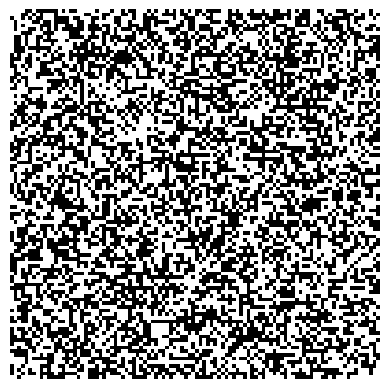

100%|██████████| 5000000/5000000 [00:36<00:00, 138358.01it/s]

[176, -1044, -2148, -2884, -3524, -4052, -4576, -5056, -5540, -5932, -6192, -6524, -6844, -7140, -7364, -7664, -7876, -8164, -8264, -8496, -8708, -8924, -9116, -9252, -9380, -9576, -9636, -9768, -9864, -9912, -9980, -10128, -10188, -10328, -10304, -10436, -10580, -10664, -10768, -10900, -10972, -11040, -11152, -11244, -11308, -11324, -11412, -11400, -11480, -11556, -11660, -11752, -11756, -11752, -11832, -11832, -11828, -11828, -11836, -11876, -11908, -11924, -11996, -12072, -12048, -12032, -12088, -12164, -12224, -12308, -12288, -12424, -12412, -12476, -12452, -12600, -12616, -12560, -12644, -12584, -12592, -12668, -12760, -12880, -12920, -12832, -12920, -12920, -12952, -12884, -12940, -12952, -13044, -13048, -13024, -13000, -13036, -13056, -13056, -13012, -13012, -13052, -13036, -13012, -12992, -12996, -12980, -13020, -13064, -13080, -13136, -13168, -13224, -13252, -13248, -13276, -13296, -13300, -13344, -13396, -13420, -13372, -13400, -13404, -13420, -13448, -13408, -13468, -13532, 

In [7]:
lattice = generate_lattice(n)
lattice_new, list, H_list = metropolis(lattice.copy(), n=n, b=b, iter=iter)
print(H_list)

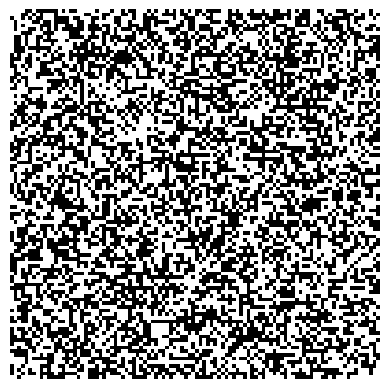

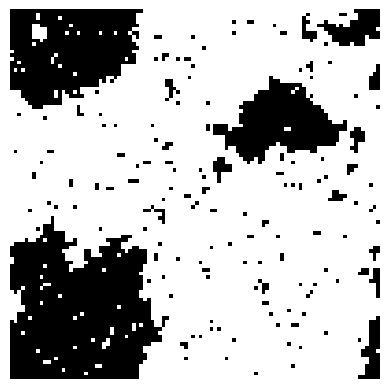

In [8]:
plot_lattice(lattice)
plot_lattice(lattice_new)

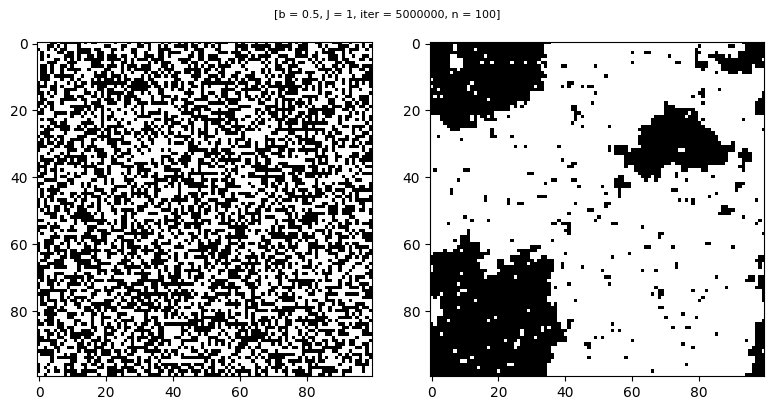

In [9]:
from plotter import plot_map
plot_map(lattice, lattice_new, b, J, iter, n, figsize =(8, 4))